## HT7 - Proyecto 2. Entrega 5
### Regresión Logística 
Diego Duarte 22075 - José Marchena 22398

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

print(house_prices.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

c:\Users\JM\Documents\Data Mining\LogisticRegression\logReg.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


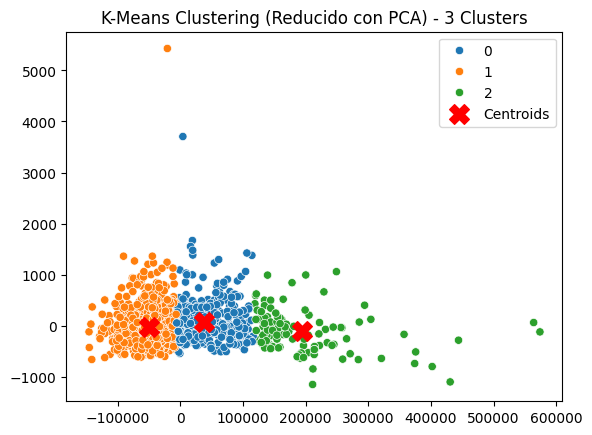

In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
import logReg

cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_set = logReg.breif_clustering(cluster_set, 3)

In [3]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    518
1    826
2    116
dtype: int64

In [4]:
# Asumiendo que ya ejecutaste el clustering y tienes `cluster_set['Cluster']`

# Añadir la columna de clusters al DataFrame original
house_prices['price_group'] = cluster_set['Cluster']

# Crear variables dicotómicas (dummy) para cada grupo de precio
house_prices['barato'] = (house_prices['price_group'] == 1).astype(int)
house_prices['medio'] = (house_prices['price_group'] == 0).astype(int)
house_prices['caro'] = (house_prices['price_group'] == 2).astype(int)

# Opcional: revisar distribución
print(house_prices[['barato', 'medio', 'caro']].sum())


barato    826
medio     518
caro      116
dtype: int64


In [5]:
house_prices = logReg.drop_many_nulls(house_prices)

# Calcular el promedio de los valores no nulos
promedio = house_prices["LotFrontage"].mean()
promedioYear = house_prices["GarageYrBlt"].mean()

# Reemplazar los NaN con el promedio
house_prices["LotFrontage"].fillna(promedio, inplace=True)
house_prices["GarageYrBlt"].fillna(promedioYear, inplace=True)

cheapHouses = logReg.trans_categorical(house_prices).drop(['price_group', 'medio', 'caro'], axis=1)
mediumHouses = logReg.trans_categorical(house_prices).drop(['price_group', 'barato', 'caro'], axis=1)
expensiveHouses = logReg.trans_categorical(house_prices).drop(['price_group', 'medio', 'barato'], axis=1)


C:\Users\JM\AppData\Local\Temp\ipykernel_19352\487058513.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_prices["LotFrontage"].fillna(promedio, inplace=True)
C:\Users\JM\AppData\Local\Temp\ipykernel_19352\487058513.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Precio mínimo: $34900
Precio máximo: $174500


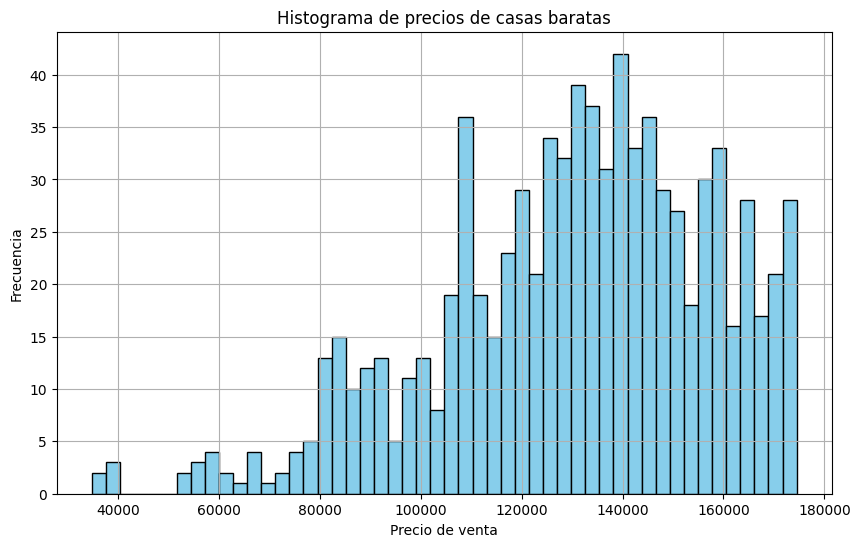

In [6]:
import matplotlib.pyplot as plt

# Filtrar casas baratas
casas_baratas = cheapHouses[cheapHouses["barato"] == 1]

# Calcular mínimo y máximo
precio_min = casas_baratas["SalePrice"].min()
precio_max = casas_baratas["SalePrice"].max()

print(f"Precio mínimo: ${precio_min}")
print(f"Precio máximo: ${precio_max}")

# Crear histograma
plt.figure(figsize=(10,6))
plt.title("Histograma de precios de casas baratas")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.hist(casas_baratas["SalePrice"], bins=50, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()



Precio mínimo (medio): $174900
Precio máximo (medio): $297000


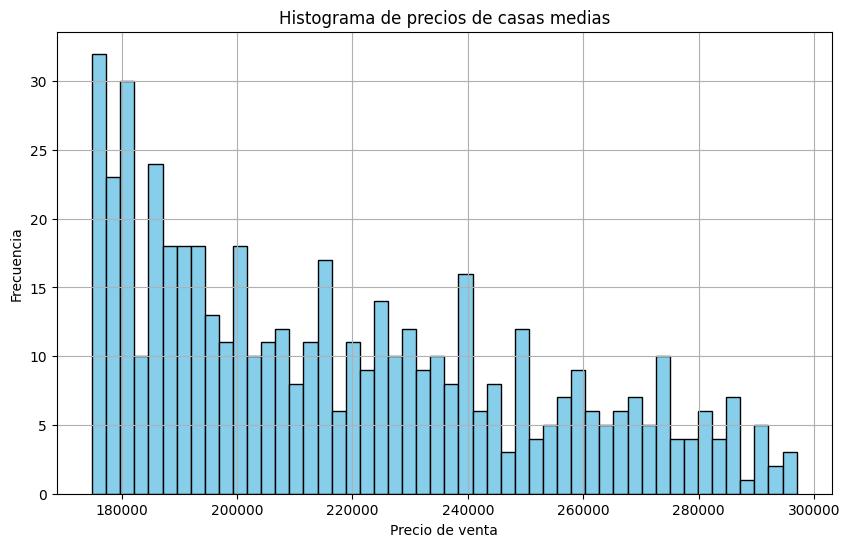

In [7]:
import matplotlib.pyplot as plt

# Filtrar casas medias
casas_medias = mediumHouses[mediumHouses["medio"] == 1]

# Calcular mínimo y máximo
precio_min = casas_medias["SalePrice"].min()
precio_max = casas_medias["SalePrice"].max()

print(f"Precio mínimo (medio): ${precio_min}")
print(f"Precio máximo (medio): ${precio_max}")

# Crear histograma
plt.figure(figsize=(10,6))
plt.title("Histograma de precios de casas medias")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.hist(casas_medias["SalePrice"], bins=50, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()



Precio mínimo (caro): $299800
Precio máximo (caro): $755000


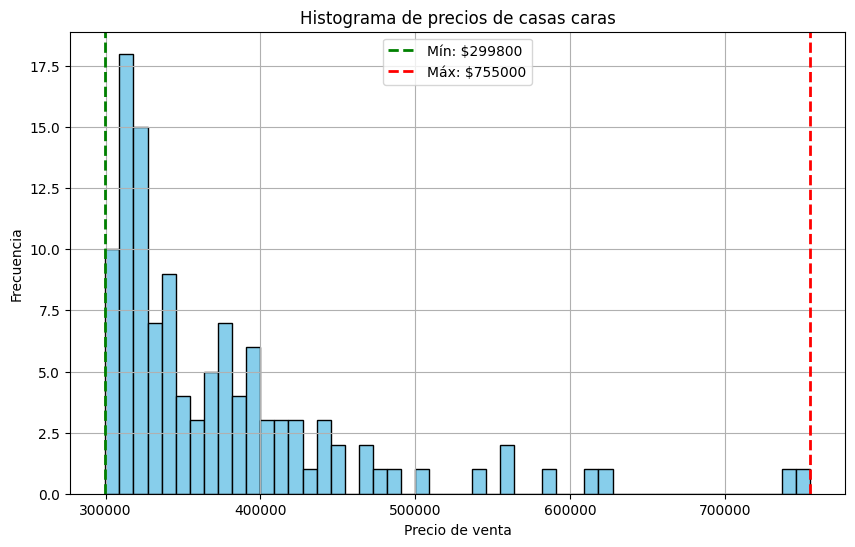

In [8]:
import matplotlib.pyplot as plt

# Filtrar casas caras
casas_caras = expensiveHouses[expensiveHouses["caro"] == 1]

# Calcular mínimo y máximo
precio_min = casas_caras["SalePrice"].min()
precio_max = casas_caras["SalePrice"].max()

print(f"Precio mínimo (caro): ${precio_min}")
print(f"Precio máximo (caro): ${precio_max}")

# Crear histograma
plt.figure(figsize=(10,6))
plt.title("Histograma de precios de casas caras")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.hist(casas_caras["SalePrice"], bins=50, color='skyblue', edgecolor='black')

# Agregar líneas de mínimo y máximo
plt.axvline(precio_min, color='green', linestyle='dashed', linewidth=2, label=f"Mín: ${precio_min}")
plt.axvline(precio_max, color='red', linestyle='dashed', linewidth=2, label=f"Máx: ${precio_max}")

plt.legend()
plt.grid(True)
plt.show()


In [9]:
casas_baratas.count()

MSSubClass       826
MSZoning         826
LotFrontage      826
LotArea          826
Street           826
LotShape         826
LandContour      826
Utilities        826
LotConfig        826
LandSlope        826
Neighborhood     826
Condition1       826
Condition2       826
BldgType         826
HouseStyle       826
OverallQual      826
OverallCond      826
YearBuilt        826
YearRemodAdd     826
RoofStyle        826
RoofMatl         826
Exterior1st      826
Exterior2nd      826
ExterQual        826
Foundation       826
BsmtQual         826
BsmtCond         826
BsmtExposure     826
BsmtFinType1     826
BsmtFinType2     826
TotalBsmtSF      826
Heating          826
HeatingQC        826
CentralAir       826
Electrical       826
1stFlrSF         826
GrLivArea        826
BsmtFullBath     826
FullBath         826
HalfBath         826
BedroomAbvGr     826
KitchenQual      826
TotRmsAbvGrd     826
Functional       826
Fireplaces       826
GarageType       826
GarageYrBlt      826
GarageFinish 

#### Casas Baratas

In [10]:
from sklearn.model_selection import train_test_split

yCheap = cheapHouses.pop("barato")
XCheap = cheapHouses
XCheap.drop(["SalePrice"], axis=1, inplace=True)
XCheap_train, XCheap_test,yCheap_train, yCheap_test = train_test_split(XCheap, yCheap,test_size=0.3,train_size=0.7)

In [11]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(solver='liblinear')
result = logReg.fit(XCheap_train,yCheap_train)

In [12]:
yCheap_pred = logReg.predict(XCheap_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(XCheap_test, yCheap_test)))

Accuracy of logistic regression classifier on test set: 0.91


              precision    recall  f1-score   support

           0       0.88      0.89      0.88       174
           1       0.92      0.92      0.92       264

    accuracy                           0.91       438
   macro avg       0.90      0.90      0.90       438
weighted avg       0.91      0.91      0.91       438



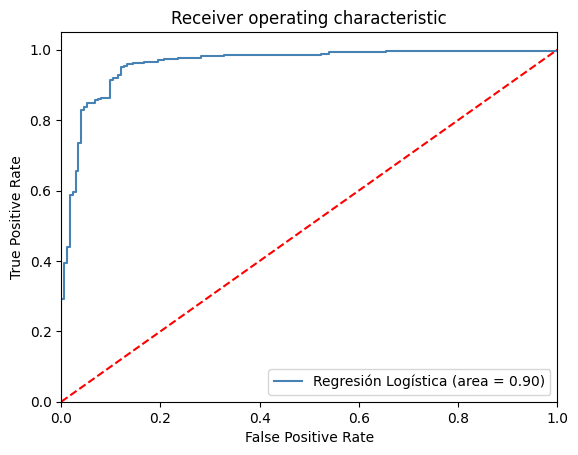

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

print(classification_report(yCheap_test,yCheap_pred))

logit_roc_auc = roc_auc_score(yCheap_test, logReg.predict(XCheap_test))
fpr, tpr, thresholds = roc_curve(yCheap_test, logReg.predict_proba(XCheap_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Casas Medias

In [14]:
yMedium = mediumHouses.pop("medio")
XMedium = mediumHouses
XMedium.drop(["SalePrice"], axis=1, inplace=True)
XMedium_train, XMedium_test,yMedium_train, yMedium_test = train_test_split(XMedium, yMedium,test_size=0.3,train_size=0.7)

In [15]:
logReg = LogisticRegression(solver='liblinear')
result = logReg.fit(XMedium_train,yMedium_train)

In [16]:
yMedium_pred = logReg.predict(XMedium_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(XMedium_test, yMedium_test)))

Accuracy of logistic regression classifier on test set: 0.79


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       282
           1       0.70      0.75      0.72       156

    accuracy                           0.79       438
   macro avg       0.78      0.78      0.78       438
weighted avg       0.80      0.79      0.80       438



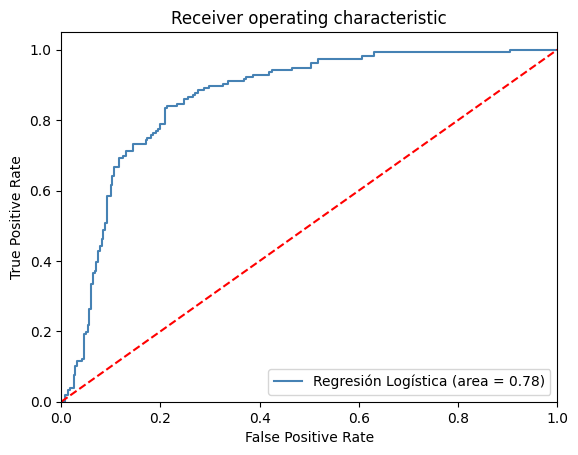

In [17]:
print(classification_report(yMedium_test,yMedium_pred))

logit_roc_auc = roc_auc_score(yMedium_test, logReg.predict(XMedium_test))
fpr, tpr, thresholds = roc_curve(yMedium_test, logReg.predict_proba(XMedium_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Casas Caras

In [18]:
yExpensive = expensiveHouses.pop("caro")
XExpensive = expensiveHouses
XExpensive.drop(["SalePrice"], axis=1, inplace=True)
XExpensive_train, XExpensive_test,yExpensive_train, yExpensive_test = train_test_split(XExpensive, yExpensive,test_size=0.3,train_size=0.7)

In [19]:
logReg = LogisticRegression(solver='liblinear')
result = logReg.fit(XExpensive_train,yExpensive_train)

In [20]:
yExpensive_pred = logReg.predict(XExpensive_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(XExpensive_test, yExpensive_test)))

Accuracy of logistic regression classifier on test set: 0.97


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       410
           1       0.74      0.82      0.78        28

    accuracy                           0.97       438
   macro avg       0.86      0.90      0.88       438
weighted avg       0.97      0.97      0.97       438



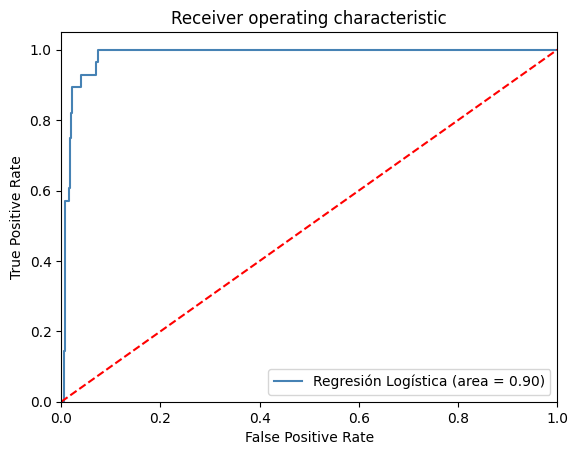

In [21]:
print(classification_report(yExpensive_test,yExpensive_pred))

logit_roc_auc = roc_auc_score(yExpensive_test, logReg.predict(XExpensive_test))
fpr, tpr, thresholds = roc_curve(yExpensive_test, logReg.predict_proba(XExpensive_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Modelo Final

In [22]:
print(house_prices["SalePrice"].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [23]:
threshold = house_prices["SalePrice"].quantile(0.65)  # Top 35% más caro


In [24]:
house_prices["caro"] = (house_prices["SalePrice"] > threshold).astype(int)


In [25]:
df_final_house = house_prices.drop(['price_group', 'medio', 'barato'], axis=1)

print(df_final_house.head())


   MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0            13           2           2   
1          0          2          0             9           1           2   
2          0          4          0            13           2           2   
3          0          0          0            14           2           2   
4          0          2          0            22           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  

In [26]:
y = df_final_house.pop("caro")
X = df_final_house
X.drop(["SalePrice"], axis=1, inplace=True)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [27]:
y.value_counts()

caro
0    951
1    509
Name: count, dtype: int64

In [28]:
logReg = LogisticRegression(solver='liblinear')
result = logReg.fit(X_train,y_train)

In [29]:
y_pred = logReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       292
           1       0.86      0.90      0.88       146

    accuracy                           0.92       438
   macro avg       0.90      0.91      0.91       438
weighted avg       0.92      0.92      0.92       438



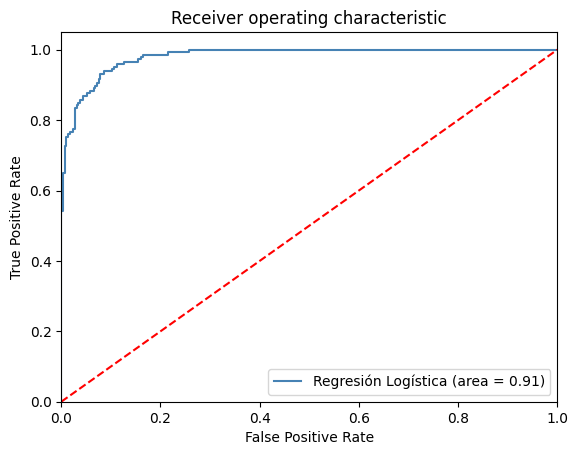

In [30]:
print(classification_report(y_test,y_pred))

logit_roc_auc = roc_auc_score(y_test, logReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Validacion Cruzada

In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [32]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_model = grid_result.best_estimator_
print(grid_search)

Best: 0.928311 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.922374 (0.021024) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.902511 (0.023440) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.927169 (0.021257) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.922603 (0.020711) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.902740 (0.024403) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924658 (0.018632) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.924201 (0.021217) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.904795 (0.025588) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.925114 (0.020313) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.926027 (0.020805) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.902283 (0.026991) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.925799 (0.022515) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.928311 (0.021054) wi

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       292
           1       0.91      0.94      0.92       146

    accuracy                           0.95       438
   macro avg       0.94      0.95      0.94       438
weighted avg       0.95      0.95      0.95       438



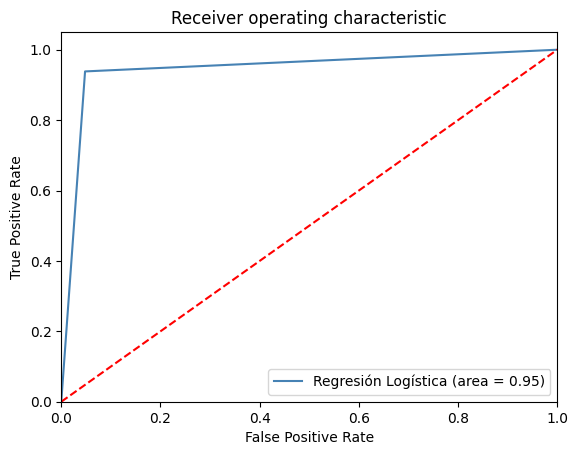

In [33]:
ypred = best_model.predict(X_test)
print(classification_report(y_test,ypred))

logit_roc_auc = roc_auc_score(y_test, ypred)
fpr, tpr, thresholds = roc_curve(y_test, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Multicolinealidad

In [34]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Agregar constante al DataFrame
X = add_constant(df_final_house)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar ordenado
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


c:\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


         Variable           VIF
0           const  2.454150e+06
37      GrLivArea  8.251806e+00
18      YearBuilt  7.178402e+00
36       1stFlrSF  6.034377e+00
49     GarageCars  5.855095e+00
50     GarageArea  5.831603e+00
1      MSSubClass  5.056106e+00
22    Exterior1st  4.690411e+00
23    Exterior2nd  4.689611e+00
43   TotRmsAbvGrd  4.643604e+00
14       BldgType  4.543219e+00
31    TotalBsmtSF  4.521351e+00
47    GarageYrBlt  3.833095e+00
16    OverallQual  3.267265e+00
39       FullBath  3.030683e+00
19   YearRemodAdd  2.613676e+00
41   BedroomAbvGr  2.446567e+00
40       HalfBath  2.256782e+00
15     HouseStyle  2.148472e+00
25     Foundation  2.033102e+00
17    OverallCond  1.862366e+00
46     GarageType  1.839713e+00
51     GarageQual  1.775979e+00
52     GarageCond  1.738781e+00
3     LotFrontage  1.688504e+00
34     CentralAir  1.675176e+00
45     Fireplaces  1.635440e+00
4         LotArea  1.600047e+00
29   BsmtFinType1  1.589536e+00
10      LandSlope  1.589495e+00
38   Bsm

In [35]:
# Calcular la correlación entre las variables numéricas
# correlation_matrix = df_final_house.corr()

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Configurar el tamaño del gráfico
# plt.figure(figsize=(12, 8))

# # Crear el mapa de calor
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# # Mostrar el gráfico
# plt.title('Matriz de Correlación de las Variables')
# plt.show()



### Tuneo del modelo

In [57]:
lr_tuned = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid_lr = dict(solver=solvers,penalty=penalty,C=c_values)
cv_lr = RepeatedStratifiedKFold(
    n_splits=10, 
    n_repeats=3, 
    random_state=42)
gs_lr = GridSearchCV(
    estimator=lr_tuned, 
    param_grid=grid_lr, 
    n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

gr_lr = gs_lr.fit(X, y)
print("Best: %f using %s" % (gr_lr.best_score_, gr_lr.best_params_))
means = gr_lr.cv_results_['mean_test_score']
stds = gr_lr.cv_results_['std_test_score']
params = gr_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_model = gr_lr.best_estimator_
print(gs_lr)

Best: 0.928311 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.922603 (0.020861) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.905479 (0.021104) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924201 (0.018959) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.922603 (0.020711) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.904110 (0.027053) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.922146 (0.020961) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.924201 (0.021217) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.905708 (0.022417) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.925114 (0.019608) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.926256 (0.020600) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.905023 (0.022491) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.926941 (0.021173) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.928311 (0.020375) wi

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       292
           1       0.88      0.90      0.89       146

    accuracy                           0.93       438
   macro avg       0.92      0.92      0.92       438
weighted avg       0.93      0.93      0.93       438



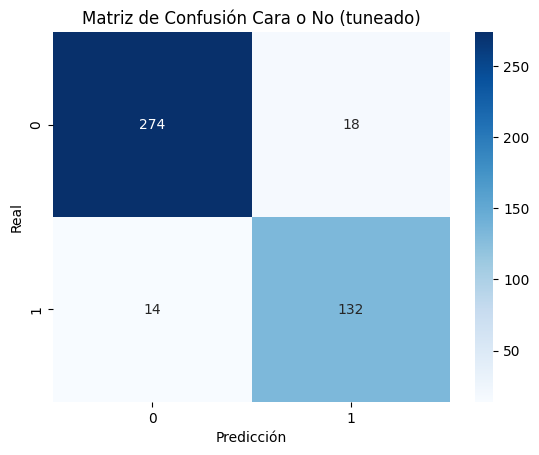

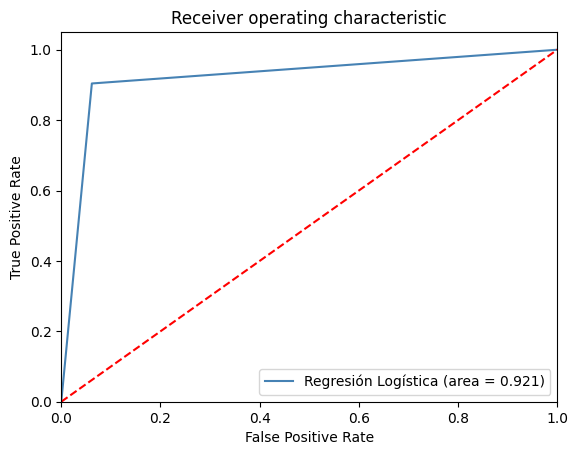

In [61]:
final_model = LogisticRegression(**gr_lr.best_params_)
final_model.fit(X_train, y_train)
ypred = final_model.predict(X_test)
# Classification report
print(classification_report(y_test,ypred))
# Confusion Matrix
cm_custom = confusion_matrix(y_test, ypred)
sns.heatmap(cm_custom, annot=True,cmap='Blues', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Cara o No (tuneado)")
plt.show()
# curva ROC
logit_roc_auc = roc_auc_score(y_test, ypred)
fpr, tpr, thresholds = roc_curve(y_test, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.3f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Tiempo y Memoria

In [62]:
import performance
# Tuneado
final_model = LogisticRegression(**gr_lr.best_params_)
performance.time_and_memory(
    model= final_model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    title="Tuneado"
)

# Original
performance.time_and_memory(
    model= logReg,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    title="Original"
)


Training Tuneado: 
- Tiempo: 1.36s
- Memoria Peak: 266.7890625 MiB
Predicting Tuneado: 
- Tiempo: 3.71s
- Memoria Peak: 266.7890625 MiB
Training Original: 
- Tiempo: 2.01s
- Memoria Peak: 266.59765625 MiB
Predicting Original: 
- Tiempo: 4.43s
- Memoria Peak: 266.59765625 MiB


In [64]:
import statsmodels.api as sm
from logReg import aic_bic

tuned_aic, tuned_bic = aic_bic(final_model, X_test, y_test)
og_aic, og_bic = aic_bic(logReg, X_test, y_test)
print(f"Modelo original: AIC = {og_aic} BIC = {og_bic}")
print(f"Modelo tuneado: AIC = {tuned_aic} BIC = {tuned_bic}")



Modelo original: AIC = 265.14992388709754 BIC = 501.91862068893136
Modelo tuneado: AIC = 265.05428682967454 BIC = 501.8229836315084


### Comparacion entre metodos


Logistic Regression (best)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       292
           1       0.88      0.90      0.89       146

    accuracy                           0.93       438
   macro avg       0.92      0.92      0.92       438
weighted avg       0.93      0.93      0.93       438



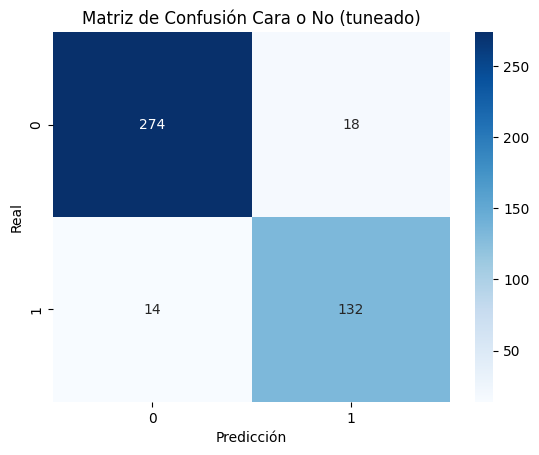

In [ ]:
best_lr = LogisticRegression(**gr_lr.best_params_)
best_lr.fit(X_train, y_train)
ypred_lr = final_model.predict(X_test)

print(classification_report(y_test,ypred_lr))
# Confusion Matrix
cm_custom = confusion_matrix(y_test, ypred_lr)
sns.heatmap(cm_custom, annot=True,cmap='Blues', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Cara o No (tuneado)")
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       292
           1       0.94      0.89      0.91       146

    accuracy                           0.94       438
   macro avg       0.94      0.93      0.93       438
weighted avg       0.94      0.94      0.94       438



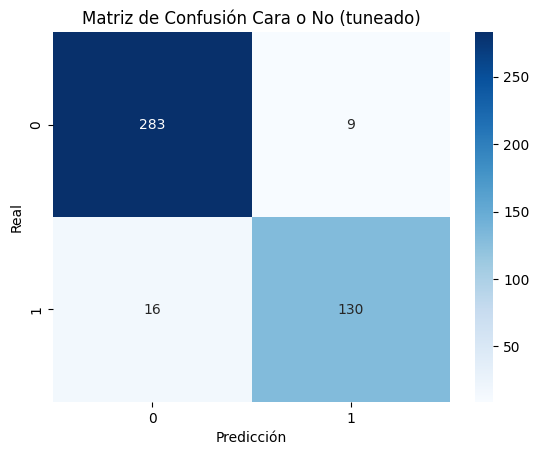

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
ypred_rf = rf_model.predict(X_test)

print(classification_report(y_test,ypred_rf))
# Confusion Matrix
cm_custom = confusion_matrix(y_test, ypred_rf)
sns.heatmap(cm_custom, annot=True,cmap='Blues', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Cara o No (tuneado)")
plt.show()

Naive Bayes

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       292
           1       0.74      0.95      0.83       146

    accuracy                           0.87       438
   macro avg       0.86      0.89      0.86       438
weighted avg       0.89      0.87      0.88       438



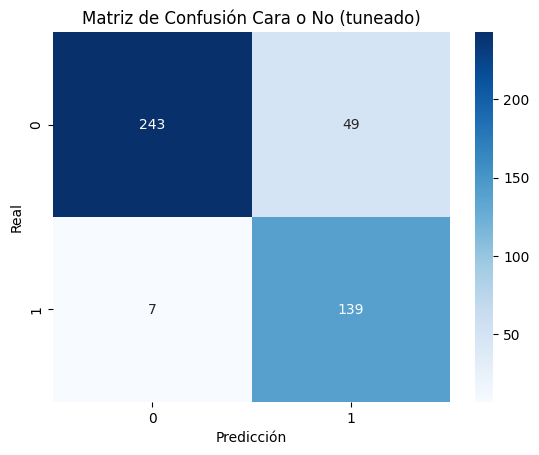

In [67]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
ypred_nb = nb_model.predict(X_test)

print(classification_report(y_test,ypred_nb))
# Confusion Matrix
cm_custom = confusion_matrix(y_test, ypred_nb)
sns.heatmap(cm_custom, annot=True,cmap='Blues', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Cara o No (tuneado)")
plt.show()

Comparacion